The link for the original Assignment3 document by Alexey Grigorev:

https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/03-classification/homework.md

### Dataset

In this homework, we will use the California Housing Prices data from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```
We'll keep working with the `'median_house_value'` variable, and we'll transform it to a classification task. 
 

### Features

For the rest of the homework, you'll need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`,
* `'ocean_proximity'`,

### Environments

In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wget
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [280]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
# use this one time
# wget.download(url) 

In [281]:
df = pd.read_csv('housing.csv')

### Data preparation

* Select only the features from above and fill in the missing values with 0.
* Create a new column `rooms_per_household` by dividing the column `total_rooms` by the column `households` from dataframe. 
* Create a new column `bedrooms_per_room` by dividing the column `total_bedrooms` by the column `total_rooms` from dataframe. 
* Create a new column `population_per_household` by dividing the column `population` by the column `households` from dataframe. 


In [282]:
df.total_rooms / df.households

0        6.984127
1        6.238137
2        8.288136
3        5.817352
4        6.281853
           ...   
20635    5.045455
20636    6.114035
20637    5.205543
20638    5.329513
20639    5.254717
Length: 20640, dtype: float64

In [283]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [284]:
df = df.fillna(0)

In [285]:
# Create a new column
df['rooms_per_household'] = df.total_rooms / df.households

In [286]:
# Create a new column
df['bedrooms_per_room'] = df.total_bedrooms / df.total_rooms

In [287]:
# Create a new column
df['population_per_household'] = df.population / df.households

In [288]:
df.head().T
dfOrg = df.copy()

### Question 1

What is the most frequent observation (mode) for the column `ocean_proximity`?

Options:
* `NEAR BAY`
* `<1H OCEAN`
* `INLAND`
* `NEAR OCEAN`

In [289]:
# most frequent observations
df.ocean_proximity.value_counts() # the anser is ''<1H OCEAN'  9136

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Question 2

* Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your train dataset.
    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

Options:
* `total_bedrooms` and `households`
* `total_bedrooms` and `total_rooms`
* `population` and `households`
* `population_per_household` and `total_rooms`


In [290]:
#options = ['total_bedrooms','households','total_rooms','population','population_per_household']
corrMatrix = df.corr()
corrMatrix # my answer is /// 'total_bedrooms and households' 
# the correlation between them 0.97

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068082,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.084836,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.065318,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.104112,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.317063,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.125396,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.920196,0.857126,0.918484,0.198050,0.134153,0.133798,-0.174583,-0.024581
total_bedrooms,0.068082,-0.065318,-0.317063,0.920196,1.000000,0.866266,0.966507,-0.007295,0.049148,0.002717,0.122205,-0.028019
population,0.099773,-0.108785,-0.296244,0.857126,0.866266,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.031397,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.966507,0.907222,1.000000,0.013033,0.065843,-0.080598,0.059818,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007295,0.004834,0.013033,1.000000,0.688075,0.326895,-0.573836,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049148,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.238759,-0.023737
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.002717,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.387465,-0.004852


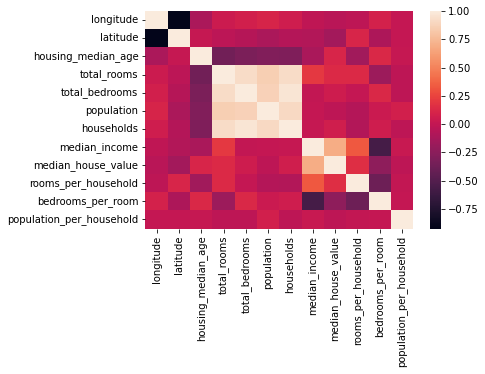

In [291]:
sns.heatmap(corrMatrix) 
plt.show()

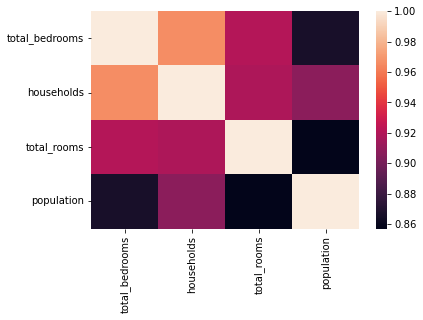

In [292]:
options = ['total_bedrooms','households','total_rooms','population']
corrMatrix = df[options].corr()

sns.heatmap(corrMatrix) 
plt.show() 

### Make `median_house_value` binary

* We need to turn the `median_house_value` variable from numeric into binary.
* Let's create a variable `above_average` which is `1` if the `median_house_value` is above its mean value and `0` otherwise.

In [293]:
above_average = (df.median_house_value.mean() < df.median_house_value)
df.median_house_value = above_average.astype(int)
df.median_house_value.value_counts()

0    12255
1     8385
Name: median_house_value, dtype: int64


### Split the data

* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to 42.
* Make sure that the target value (`median_house_value`) is not in your dataframe.

In [294]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state  = 42)
assert len(df) * 0.2 == len(df_full_train) * 0.25

In [295]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state= 42)

In [296]:
df_train.shape[0], df_val.shape[0], df_test.shape[0] #  splitting is successful

(12384, 4128, 4128)

In [297]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [298]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [299]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17244,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.754011
8817,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,2.789082
19686,-121.62,39.13,41.0,1317.0,309.0,856.0,337.0,1.6719,INLAND,3.908012,0.234624,2.540059
3545,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201093,0.194158,2.059016
17019,-122.30,37.52,38.0,2769.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010127,0.139762,2.516456


### Question 3

* Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
* What is the value of mutual information?
* Round it to 2 decimal digits using `round(score, 2)`

Options:
- 0.26
- 0
- 0.10
- 0.16

In [300]:
# categorical variable is ocean_proximity
# y_train our binarized price 
mutual_info_score(df_train.ocean_proximity, y_train).round(2) # answe is 0.1 

0.1

### Question 4

* Now let's train a logistic regression
* Remember that we have one categorical variable `ocean_proximity` in the data. Include it using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Options:
- 0.60
- 0.72
- 0.84
- 0.95


In [301]:
dict_train = df_train.to_dict(orient = 'records')
dict_val = df_val.to_dict(orient = 'records')
dict_test = df_test.to_dict(orient = 'records')

dv = DictVectorizer(sparse = False)
X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)
X_test = dv.transform(dict_test)

In [302]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [303]:
globalScore = model.score(X_val, y_val)
model.score(X_val, y_val).round(2) # answer is 0.84

0.84

In [304]:
# Another way 
score = (model.predict(X_val) == y_val).mean()
round(score, 2)

0.84

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 
* Which of following feature has the smallest difference? 
   * `total_rooms`
   * `total_bedrooms` 
   * `population`
   * `households`

> **note**: the difference doesn't have to be positive

In [305]:
columnsList =  list(df_train.columns)
#no_total_rooms = columnsList.remove('total_rooms')
print(columnsList)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']


In [306]:
def calculate_acc(withoutThis):    
    columnsList =  list(df_train.columns)
    columnsList.remove(withoutThis)
    dict_train_wo_this = df_train[columnsList].to_dict(orient = 'records')
    dict_val_wo_this= df_val[columnsList].to_dict(orient = 'records')

    dv = DictVectorizer(sparse = False)
    X_train_wo_this = dv.fit_transform(dict_train_wo_this)
    X_val_wo_this = dv.transform(dict_val_wo_this)

    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train_wo_this, y_train)
    score_wo_this = model.score(X_val_wo_total_rooms, y_val)
    print(withoutThis, score_wo_this)
    return score_wo_this

In [307]:
small_features = ['total_rooms','total_bedrooms','population','households']
accDiff = []
for col in small_features:
    score = calculate_acc(col)
    accDiff.append(abs(globalScore - score))
    
accDiff # the anser is total_rooms

total_rooms 0.8362403100775194
total_bedrooms 0.8347868217054264
population 0.5930232558139535
households 0.5935077519379846


[0.00024224806201555982,
 0.001211240310077466,
 0.24297480620155032,
 0.2424903100775193]

### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column `'median_house_value'`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model (`model = Ridge(alpha=a, solver="sag", random_state=42)`) on the training data.
* This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest `alpha`.

Options:
- 0
- 0.01
- 0.1
- 1
- 10

In [310]:
df = dfOrg.copy()

In [311]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state  = 42)
assert len(df) * 0.2 == len(df_full_train) * 0.25

In [312]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state= 42)

In [313]:
df_train.shape[0], df_val.shape[0], df_test.shape[0] #  splitting is successful

(12384, 4128, 4128)

In [314]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [315]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [338]:
alpha = [0, 0.01, 0.1, 1, 10]


In [339]:
for a in alpha:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    rms = mean_squared_error(y_test, y_predicted, squared=False)
    print(a, rms.round(3))

0 0.566
0.01 0.566
0.1 0.566
1 0.566
10 0.566


## Deadline

The deadline for submitting is 26 September (Monday), 23:00 CEST.
